In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# importing the required libraries
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Scaler Library
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#KNN Imputer library
from sklearn.impute import KNNImputer

# Train-Test Split
from sklearn.model_selection import train_test_split 

# Model Import 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV # GridSearch for finding the best parameter

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error # Model Evaluation Parameter

In [3]:
# importing the training dataset
df=pd.read_csv('/content/drive/My Drive/House Prices - Advanced Regression Problem/Dataset/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
print(pd.__version__)

1.3.5


In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df.select_dtypes(include = ['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# Dividing the dataset in numerical and categorical columns

In [9]:
df_cat = df.select_dtypes(include = ['object'])
df_num = df.select_dtypes(exclude = ['object'])

In [10]:
df_num.select_dtypes(include = ['float64'])

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


**Observation**

*GarageYrBlt* should have been integer rather than float

In [11]:
df_num.select_dtypes(include = ['int64']).head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


## Checking the null values in the Dataset

In [12]:
df_cat.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [13]:
df_cat.isnull().sum()/len(df_cat)

MSZoning         0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinType2     0.026027
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.000685
KitchenQual      0.000000
Functional       0.000000
FireplaceQu      0.472603
GarageType       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageCond       0.055479
PavedDrive       0.000000
PoolQC      

**Observation**


*   *Alley, PoolQC, Fence, MiscFeature* has missing values percentage in 94%, 99.5%, 81%, and 96% respectively. These fiels either should be checked with business team or dropped
*   *FireplaceQu* has 47% missing values and should be checked if the missing values can be addressed or dropped
*   *BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2,Exterior2nd, GarageType, GarageFinish, GarageQual, GarageCond* has to be treated for missing values



In [14]:
df_num.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [15]:
df_num.isnull().sum()/len(df_cat)

Id               0.000000
MSSubClass       0.000000
LotFrontage      0.177397
LotArea          0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
MasVnrArea       0.005479
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.000000
HalfBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.000000
Fireplaces       0.000000
GarageYrBlt      0.055479
GarageCars       0.000000
GarageArea       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SalePrice        0.000000
dtype: float

**Observation**


*   *LotFrontage, MasVnrArea, GarageYrBlt* has to be treated for missing values


# Missing value treatment

In [16]:
# Dropping the not necessary column

df_cat = df_cat.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [17]:
df_cat.shape

(1460, 39)

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


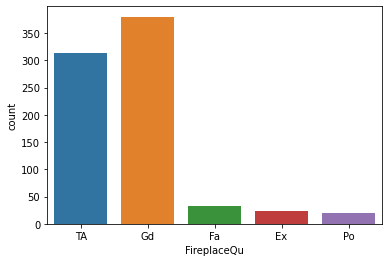

In [18]:
# 'FireplaceQu' treatment
print (df_cat['FireplaceQu'].value_counts())
sns.countplot('FireplaceQu', data=df_cat)

In [19]:
df.groupby('FireplaceQu', as_index=False)['SalePrice'].mean()

,FireplaceQu,SalePrice
0,Ex,337712.500000
1,Fa,167298.484848
2,Gd,226351.415789
3,Po,129764.150000
4,TA,205723.488818


**Observation**


*   The FireplaceQu value can be binned using the SalePrice value which is as given below
*   if 0 < SalePrice <= 150000.00 then FireplaceQu = 'Po'
*   if 150000.00 < SalePrice <= 180000.00 then FireplaceQu = 'Fa'
*   if 180000.00 < SalePrice <= 215000.00 then FireplaceQu = 'TA'
*   if 215000.00 < SalePrice <= 300000.00 then FireplaceQu = 'Gd'
*   if SalePrice > 300000.00 then FireplaceQu = 'Ex'







In [20]:
df_FireplaceQu = df[['FireplaceQu','SalePrice']]
df_FireplaceQu.head()

,FireplaceQu,SalePrice
0,NaN,208500
1,TA,181500
2,TA,223500
3,Gd,140000
4,TA,250000


In [21]:
# Identifying the index value to be used in missing value filling

df_FireplaceQu.iloc[116,0] # 'Po'
df_FireplaceQu.iloc[3,0] # 'Gd'
df_FireplaceQu.iloc[14,0] # 'Fa'
df_FireplaceQu.iloc[46,0] # 'Ex'
df_FireplaceQu.iloc[1,0] # 'TA'

'TA'

In [22]:
# Imputing the missing value of FireplaceQu based on the average SalePrice calculation

df_FireplaceQu.loc[(df_FireplaceQu['FireplaceQu'].isnull()) & (df_FireplaceQu['SalePrice'] > 0) & (df_FireplaceQu['SalePrice'] <= 150000.00) , 'FireplaceQu'] = (df_FireplaceQu.iloc[116,0])
df_FireplaceQu.loc[(df_FireplaceQu['FireplaceQu'].isnull()) & (df_FireplaceQu['SalePrice'] > 150000.00) & (df_FireplaceQu['SalePrice'] <= 180000.00) , 'FireplaceQu'] = (df_FireplaceQu.iloc[14,0])
df_FireplaceQu.loc[(df_FireplaceQu['FireplaceQu'].isnull()) & (df_FireplaceQu['SalePrice'] > 180000.00) & (df_FireplaceQu['SalePrice'] <= 215000.00) , 'FireplaceQu'] = (df_FireplaceQu.iloc[1,0])
df_FireplaceQu.loc[(df_FireplaceQu['FireplaceQu'].isnull()) & (df_FireplaceQu['SalePrice'] > 215000.00) & (df_FireplaceQu['SalePrice'] <= 300000.00) , 'FireplaceQu'] = (df_FireplaceQu.iloc[3,0])
df_FireplaceQu.loc[(df_FireplaceQu['FireplaceQu'].isnull()) & (df_FireplaceQu['SalePrice'] > 300000.00), 'FireplaceQu'] = (df_FireplaceQu.iloc[46,0])


Po    482
Gd    421
TA    392
Fa    137
Ex     28
Name: FireplaceQu, dtype: int64


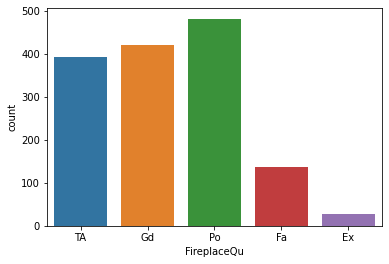

In [23]:
print (df_FireplaceQu['FireplaceQu'].value_counts())
sns.countplot('FireplaceQu', data=df_FireplaceQu)

In [24]:
# Cross checking if the updation was proper, before missing value treatment the occurence of 'Po' was only 20 and 
# the null value with 0 < SalePrice <= 150000.00 condition was 462 occurence
# Therefore, In total the occurence of 'Po' is now 482 = 462 + 20

df_cat['SalePrice'] = df['SalePrice']
df_cat[(df_cat['FireplaceQu'].isnull()) & (df_cat['SalePrice'] > 0) & (df_cat['SalePrice'] <= 150000.00)].shape[0]

462

In [25]:
df_cat['FireplaceQu'] = df_FireplaceQu['FireplaceQu']

Po    482
Gd    421
TA    392
Fa    137
Ex     28
Name: FireplaceQu, dtype: int64


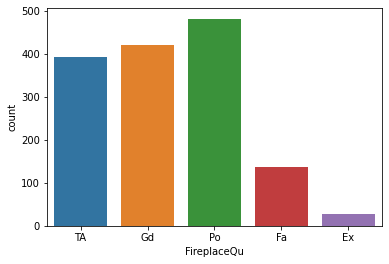

In [26]:
# FireplaceQue Missing Value treatment completed

print (df_cat['FireplaceQu'].value_counts())
sns.countplot('FireplaceQu', data=df_cat)

In [27]:
df_cat.drop(['SalePrice'], axis=1, inplace = True)

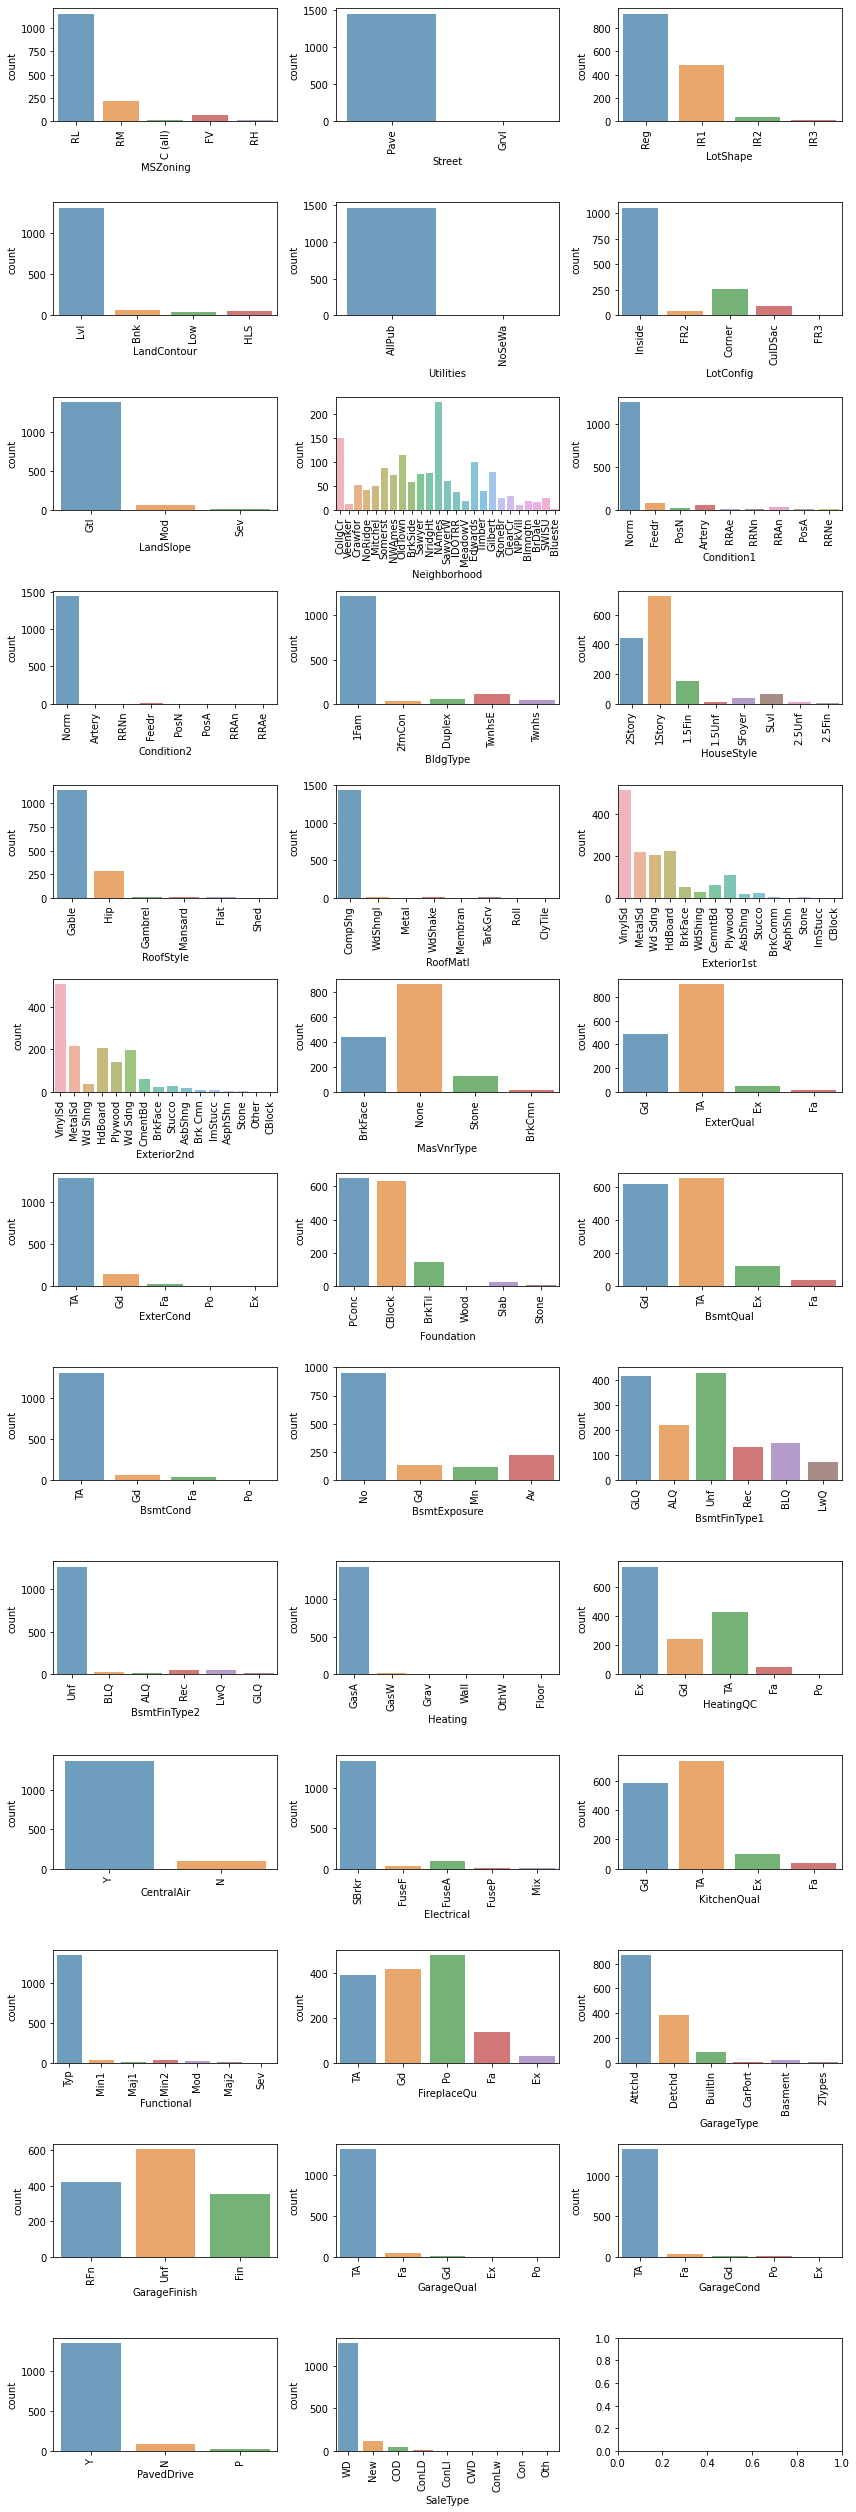

In [28]:
# Missing Value treatment for BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2,Exterior2nd, GarageType, 
# GarageFinish, GarageQual, GarageCond


# Plotting the countplot to check the values

fig, axes = plt.subplots(round(len(df_cat.columns) / 3), 3, figsize=(12, 35))

for i, ax in enumerate(fig.axes):
    # plot countplot of each feature
    if i < len(df_cat.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=df_cat.columns[i], alpha=0.7, data=df_cat, ax=ax)

fig.tight_layout()

Observation

There are many fields that has almost same value across the columnn, those features should be dropped as they provide no information

In [29]:
features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Exterior2nd', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

df_cat[features]=df_cat[features].fillna(df_cat.mode().iloc[0])

In [30]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1452 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [31]:
# Missing Value treatment completed for categorical columns

### Missing Value Treatment for numerical columns

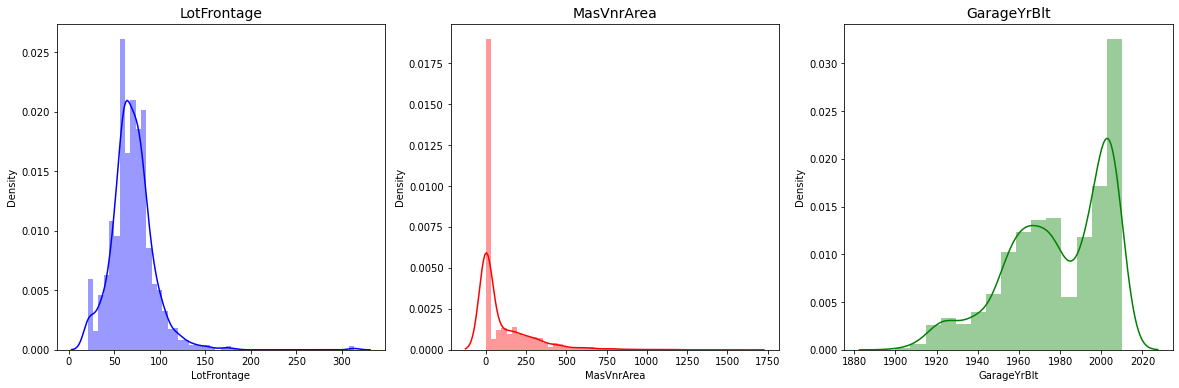

In [32]:
# LotFrontage, MasVnrArea, GarageYrBlt has to be treated for missing values

f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

ax1.set_title("LotFrontage", fontsize=14)
sns.distplot(df['LotFrontage'], color="b", ax = ax1)

ax2.set_title("MasVnrArea", fontsize=14)
sns.distplot(df['MasVnrArea'], color="r", ax = ax2)

ax3.set_title("GarageYrBlt", fontsize=14)
sns.distplot(df['GarageYrBlt'], color="g",  ax = ax3)

In [33]:
fields_null = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
df_num[fields_null]=df_num[fields_null].fillna(df_num.median().iloc[0])


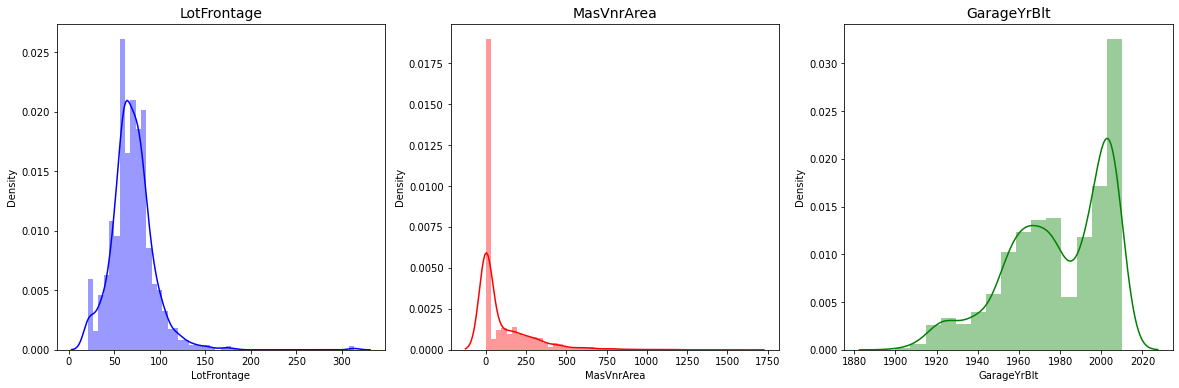

In [34]:
# LotFrontage, MasVnrArea, GarageYrBlt has to be treated for missing values

f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

ax1.set_title("LotFrontage", fontsize=14)
sns.distplot(df['LotFrontage'], color="b", ax = ax1)

ax2.set_title("MasVnrArea", fontsize=14)
sns.distplot(df['MasVnrArea'], color="r", ax = ax2)

ax3.set_title("GarageYrBlt", fontsize=14)
sns.distplot(df['GarageYrBlt'], color="g",  ax = ax3)

In [35]:
# Converting GarageYrBlt to Integer type
df_num['GarageYrBlt'] = df_num['GarageYrBlt'].astype(int)

In [36]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [37]:
# Missing Value treatment completed for numerical columns

# Feature Engineering and Feature Selection

### Categorical feature selection

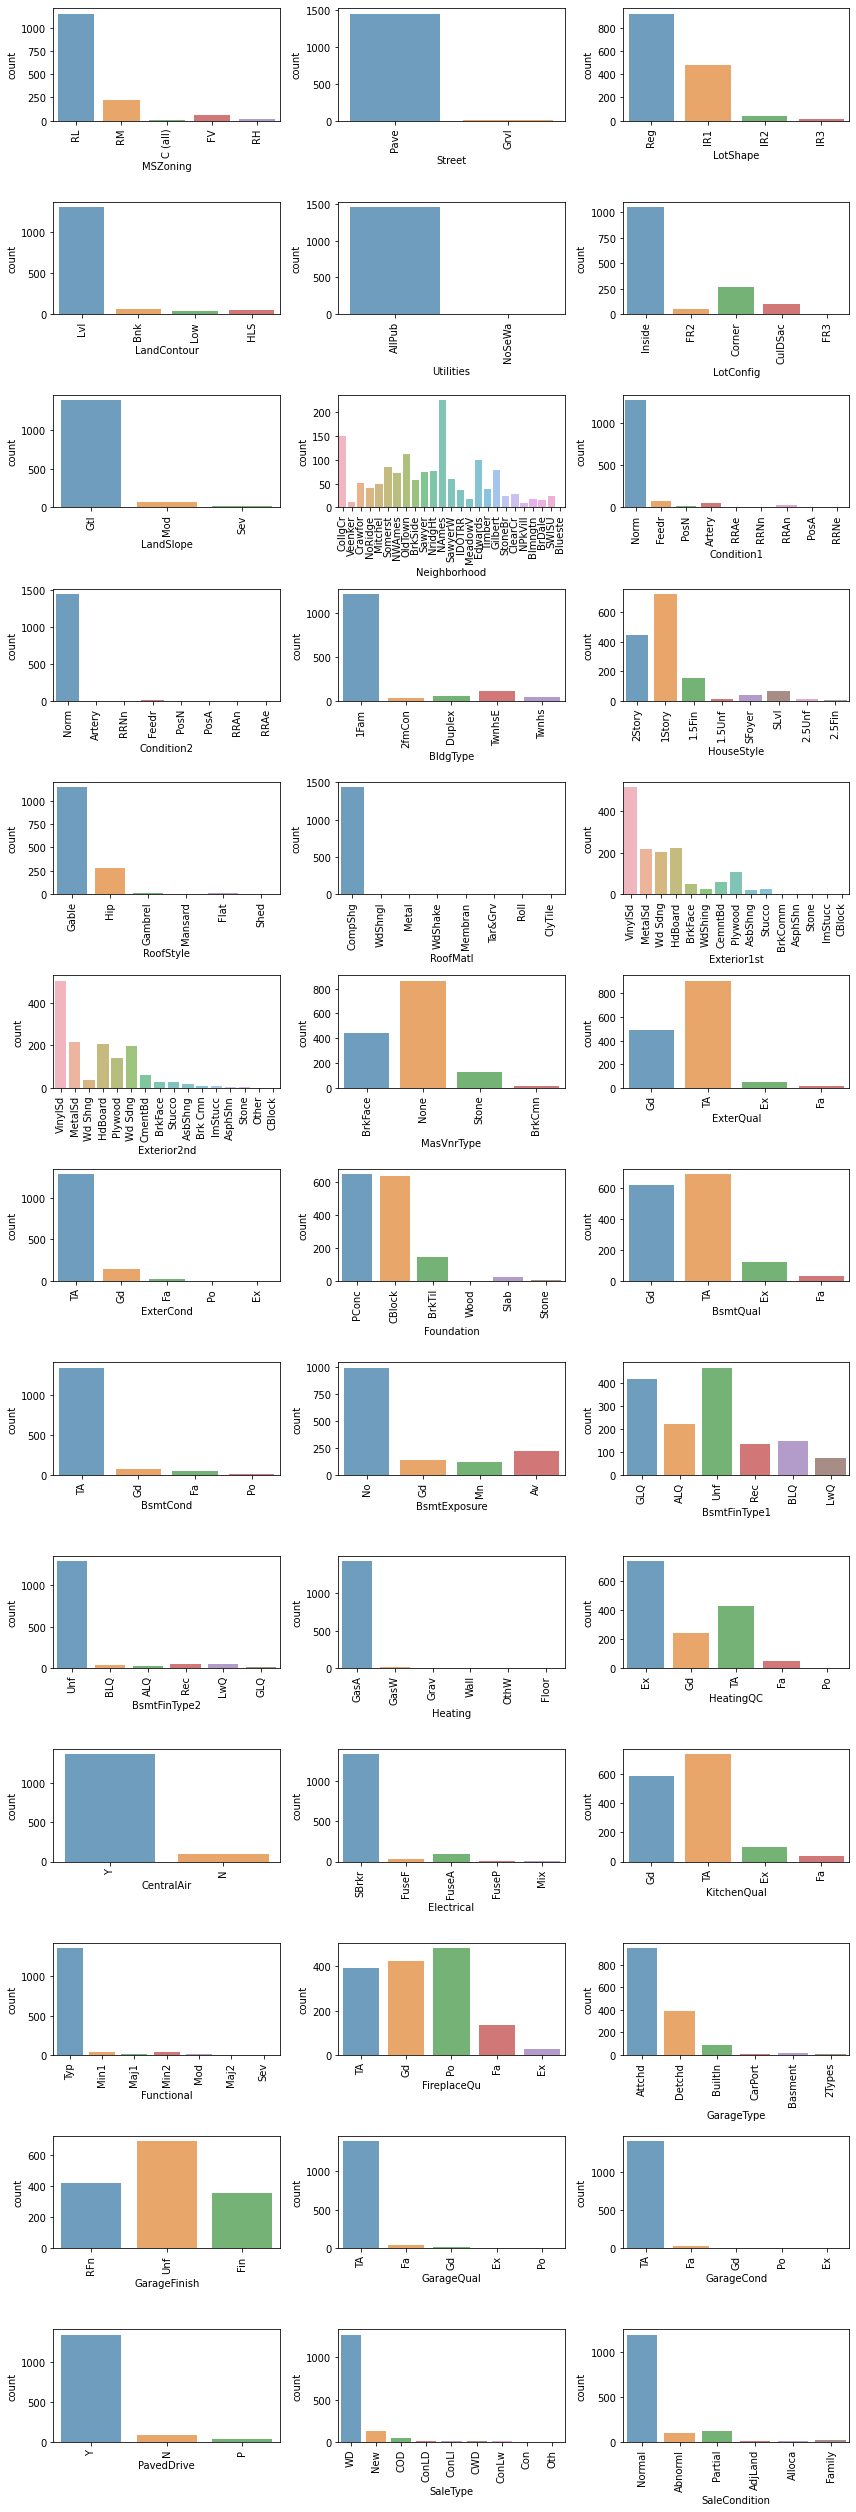

In [38]:
# Plotting the countplot to check the values

fig, axes = plt.subplots(round(len(df_cat.columns) / 3), 3, figsize=(12, 35))

for i, ax in enumerate(fig.axes):
    # plot countplot of each feature
    if i < len(df_cat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=df_cat.columns[i], alpha=0.7, data=df_cat, ax=ax)

fig.tight_layout()

In [39]:
df_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

**Observation**

*  There are many fields that has almost same value across the columnn, those features should be dropped as they provide no information
*   Following columns are to be dropped
*   ['Street', 'LandContour', 'LandSlope', 'Utilities', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating','CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType']




In [40]:
df_cat.shape

(1460, 39)

In [41]:
# Dropping the column with mostly same values across the column

df_cat = df_cat.drop(['Street', 'LandContour', 'LandSlope', 'Utilities', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating','CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType'], axis=1)

In [42]:
df_cat.shape

(1460, 22)

Observation

Based on the data dictionary, there are many categorical column that has to be label encoded as they are ordinal in nature

In [43]:
df_cat.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'SaleCondition'],
      dtype='object')


*   Non-Order - ['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'SaleCondition']
*   Ordinal - ['LotShape','ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish', ]

In [44]:
df_cat['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [45]:
# Trying label encoding using scikit label encoder
# Ideally, the values should be Reg - 4, IR1 - 3, IR2 - 2, IR3 - 1 after label encoding

df_cat['LotShape1'] = df_cat['LotShape']
df_cat['LotShape1'].value_counts()


Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape1, dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cat['LotShape1'] = le.fit_transform(df_cat['LotShape1'])

In [47]:
df_cat['LotShape1'].value_counts()

3    925
0    484
1     41
2     10
Name: LotShape1, dtype: int64

# As seen above, Scikit Label Encoder assigns the values based on the number of  occurence, whereas we have to assign the values to do proper label encoding

In [48]:
# dropping the LotShape1 column

df_cat = df_cat.drop(['LotShape1'], axis=1)

In [49]:
df_cat.shape

(1460, 22)

In [50]:
Ordinal = ['LotShape','ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish']
for i in Ordinal:
  print (df_cat[i].value_counts())

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
Po    482
Gd    421
TA    392
Fa    137
Ex     28
Name: FireplaceQu, dtype: int64
Unf    686
RFn    422
Fin    352
Name: GarageFinish, dtype: int64


In [51]:
# Performing Label Encoding by manually assigning value

df_cat['LotShape'] = df_cat['LotShape'].replace(['Reg', 'IR1', 'IR2', 'IR3'],['4','3','2','1'])

df_cat['ExterQual'] = df_cat['ExterQual'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'],['5','4','3','2','1'])

df_cat['BsmtQual'] = df_cat['BsmtQual'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'],['5','4','3','2','1'])

df_cat['BsmtExposure'] = df_cat['BsmtExposure'].replace(['Gd', 'Av', 'Mn', 'No', 'NA'],['5','4','3','2','1'])

df_cat['BsmtFinType1'] = df_cat['BsmtFinType1'].replace(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf'],['6','5','4','3','2','1'])

df_cat['HeatingQC'] = df_cat['HeatingQC'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'],['5','4','3','2','1'])

df_cat['KitchenQual'] = df_cat['KitchenQual'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'],['5','4','3','2','1'])

df_cat['FireplaceQu'] = df_cat['FireplaceQu'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'],['5','4','3','2','1'])

df_cat['GarageFinish'] = df_cat['GarageFinish'].replace(['Fin', 'RFn', 'Unf'],['3','2','1'])


In [52]:
# Checking if the replacement was proper

Ordinal = ['LotShape','ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish']
for i in Ordinal:
  print (df_cat[i].value_counts())

4    925
3    484
2     41
1     10
Name: LotShape, dtype: int64
3    906
4    488
5     52
2     14
Name: ExterQual, dtype: int64
3    686
4    618
5    121
2     35
Name: BsmtQual, dtype: int64
2    991
4    221
5    134
3    114
Name: BsmtExposure, dtype: int64
1    467
6    418
5    220
4    148
3    133
2     74
Name: BsmtFinType1, dtype: int64
5    741
3    428
4    241
2     49
1      1
Name: HeatingQC, dtype: int64
3    735
4    586
5    100
2     39
Name: KitchenQual, dtype: int64
1    482
4    421
3    392
2    137
5     28
Name: FireplaceQu, dtype: int64
1    686
2    422
3    352
Name: GarageFinish, dtype: int64


In [53]:
# Converting the ordinal categorical column to numerical column
df_cat[Ordinal] = df_cat[Ordinal].astype(int)

In [54]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   LotShape       1460 non-null   int64 
 2   LotConfig      1460 non-null   object
 3   Neighborhood   1460 non-null   object
 4   Condition1     1460 non-null   object
 5   BldgType       1460 non-null   object
 6   HouseStyle     1460 non-null   object
 7   RoofStyle      1460 non-null   object
 8   Exterior1st    1460 non-null   object
 9   Exterior2nd    1460 non-null   object
 10  MasVnrType     1452 non-null   object
 11  ExterQual      1460 non-null   int64 
 12  Foundation     1460 non-null   object
 13  BsmtQual       1460 non-null   int64 
 14  BsmtExposure   1460 non-null   int64 
 15  BsmtFinType1   1460 non-null   int64 
 16  HeatingQC      1460 non-null   int64 
 17  KitchenQual    1460 non-null   int64 
 18  FireplaceQu    1460 non-null

In [55]:
df_cat.head()

,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,...,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,SaleCondition
0,RL,4,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,...,PConc,4,2,6,5,4,3,Attchd,2,Normal
1,RL,4,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,...,CBlock,4,5,5,5,3,3,Attchd,2,Normal
2,RL,3,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,...,PConc,4,3,6,5,4,3,Attchd,2,Normal
3,RL,3,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,...,BrkTil,3,2,5,4,4,4,Detchd,1,Abnorml
4,RL,3,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,...,PConc,4,4,6,5,4,3,Attchd,2,Normal


In [56]:
# Converting the remaining Non-Ordinal categorical column to numerical column by using One-Hot-Encoding

cat_variables = ['MSZoning', 'LotConfig',	'Neighborhood',	'Condition1',	'BldgType',	'HouseStyle',	'RoofStyle',	'Exterior1st',	'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'SaleCondition']
cat_dummies = pd.get_dummies(df_cat[cat_variables], drop_first=True)
cat_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [57]:

df_cat = df_cat.drop(['MSZoning', 'LotConfig',	'Neighborhood',	'Condition1',	'BldgType',	'HouseStyle',	'RoofStyle',	'Exterior1st',	'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'SaleCondition'], axis=1)
df_cat = pd.concat([df_cat, cat_dummies], axis=1)
df_cat.head()

,LotShape,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,MSZoning_FV,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4,4,4,2,6,5,4,3,2,0,...,1,0,0,0,0,0,0,0,1,0
1,4,3,4,5,5,5,3,3,2,0,...,1,0,0,0,0,0,0,0,1,0
2,3,4,4,3,6,5,4,3,2,0,...,1,0,0,0,0,0,0,0,1,0
3,3,3,3,2,5,4,4,4,1,0,...,0,0,0,0,1,0,0,0,0,0
4,3,4,4,4,6,5,4,3,2,0,...,1,0,0,0,0,0,0,0,1,0


In [58]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 112 entries, LotShape to SaleCondition_Partial
dtypes: int64(9), uint8(103)
memory usage: 249.6 KB


### Numerical Feature Engineering and Selection

In [59]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [60]:
# Downloading the dataset in csv format to run pandas profiling on seperate jupyter notebook as installing pandas profiling is 
# changing some environment variable and creating problem

# Converting DataFrame to csv format
#df_num.to_csv('df_num.csv')

# Downloading the predictions
#from google.colab import files
#files.download('df_num.csv')

In [61]:
# Dropping the id column

df_num.drop(['Id'], axis = 1, inplace = True)

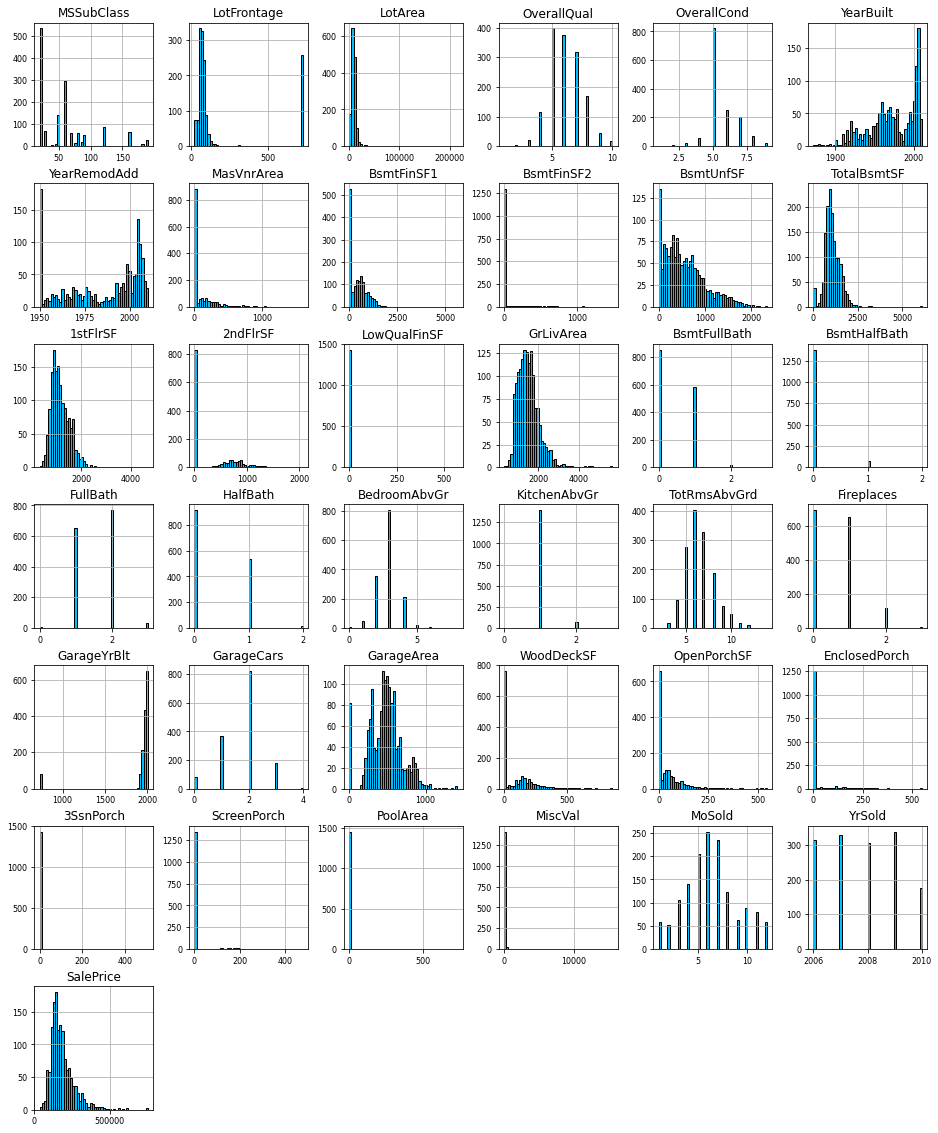

In [62]:
# Plotting the histogram to check the values and skewness in the columns

fig_ = df_num.hist(figsize=(16, 20), bins = 50, color="deepskyblue",
                           edgecolor="black", xlabelsize=8, ylabelsize=8)


**Observation**


*   From the distribution we can clearly see there are columns that are heavily skewed
*   Also, there are many columns that has same or constant value for majority of data point (Quasi-Constant features)



In [63]:
# Identifying the number of unique value of the columns

df_num.nunique(axis=0)

MSSubClass         15
LotFrontage       111
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
MasVnrArea        328
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Fireplaces          4
GarageYrBlt        98
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SalePrice         663
dtype: int64

In [64]:
# Identifying the constant or Quasi-constant features

from sklearn.feature_selection import VarianceThreshold

var_thr = VarianceThreshold(threshold = 0.1) #Removing both constant and quasi-constant
var_thr.fit(df_num)

var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [65]:
concol = [column for column in df_num.columns 
          if column not in df_num.columns[var_thr.get_support()]]

print(f"\nQuasi-constant features to be dropped: {concol}")



Quasi-constant features to be dropped: ['BsmtHalfBath', 'KitchenAbvGr']


In [66]:
# Dropping the constant or Quasi-constant features

df_num.drop(['BsmtHalfBath', 'KitchenAbvGr'], axis = 1, inplace=True)

In [67]:
df_num.shape

(1460, 35)

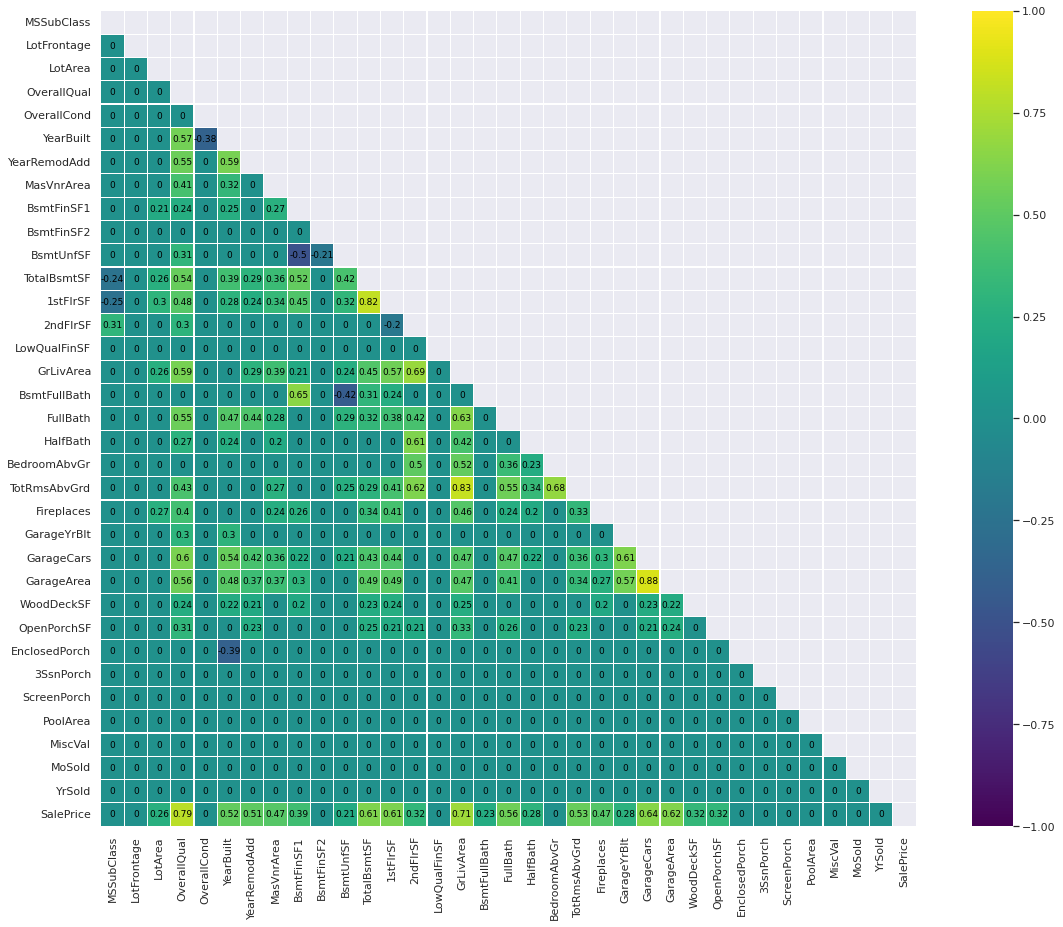

In [68]:
# Correlation Matrix for all the remaining numerical data including the taget 'SalePrice'

# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix
corr_matrix = df_num.corr()

# Replace any correlation < |0.2| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.2) & (corr_matrix > -0.2)] = 0

# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose the color map
cmap = "viridis"

# plot the heatmap
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True)

In [69]:
# Considering the correlation with SalePrice > 0.2 lets try to figure our the columns that have significance

df_num_corr = df_num.corr()["SalePrice"][:-1] # Correlation of other features with Target Variable

# Correlated features (r2 > 0.2)

high_features_list = df_num_corr[abs(df_num_corr) >= 0.2].sort_values(ascending=False)
print(f"{len(high_features_list)} strongly correlated values with SalePrice:\n{high_features_list}\n")

21 strongly correlated values with SalePrice:
OverallQual    0.79
GrLivArea      0.71
GarageCars     0.64
GarageArea     0.62
TotalBsmtSF    0.61
1stFlrSF       0.61
FullBath       0.56
TotRmsAbvGrd   0.53
YearBuilt      0.52
YearRemodAdd   0.51
MasVnrArea     0.47
Fireplaces     0.47
BsmtFinSF1     0.39
WoodDeckSF     0.32
2ndFlrSF       0.32
OpenPorchSF    0.32
HalfBath       0.28
GarageYrBlt    0.28
LotArea        0.26
BsmtFullBath   0.23
BsmtUnfSF      0.21
Name: SalePrice, dtype: float64



**Observation**


*   From 35 features we have narrowed down to 21 features that has highest correlation with *'SalePrice'* (Dependent Variable)
*   The correlation value considered here is 0.2 and that can be changes based on use case and number of columns
*   We also need to check the correlation within the columns to avoid multi-collinearity
*   We will consider 0.8 to identify and remove the high correlated Independent variables





In [70]:
# Preparing the dataframe with only Strong Correlated features

Strong_features = df_num_corr[abs(df_num_corr) >= 0.2].index.tolist()
Strong_features.append('SalePrice')

df_num_strong = df_num[Strong_features]

In [71]:
df_num_strong.shape

(1460, 22)

**Observation**

Looking at the correlation matrix, there is very high  correlation between the following features:

* 'TotalBsmtSF'  and  '1stFlrSF' [0.82]
* 'TotRmsAbvGrd'  and  'GrLivArea' [0.83]
* 'GarageCars'  and  'GarageArea' [0.88]

Therefore, we will drop '1stFlrSF', 'TotRmsAbvGrd' and 'GarageCars'



In [72]:
# Dropping high correlated Independent features

df_num_strong.drop(['1stFlrSF','TotRmsAbvGrd', 'GarageCars'], axis = 1, inplace = True)

In [73]:
df_num_strong.shape

(1460, 19)

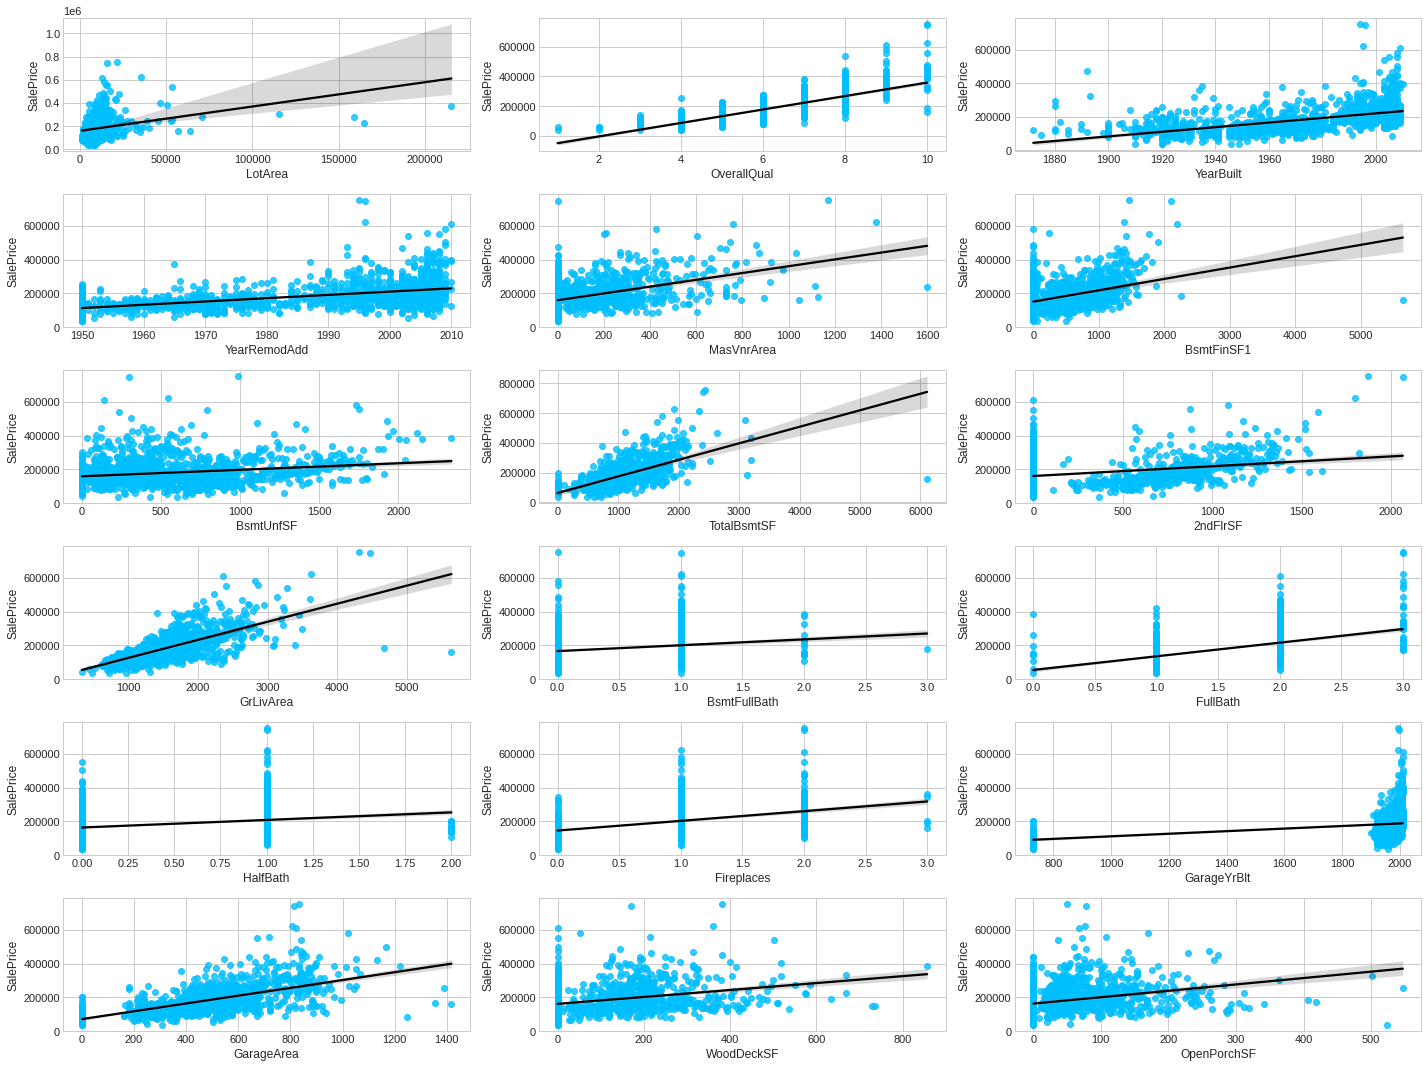

In [74]:
plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(df_num_strong.columns) / 3), 3, figsize=(20, 15))

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(df_num_strong.columns):
        sns.regplot(x=df_num_strong.columns[i], y="SalePrice", data=df_num_strong, ax=ax, scatter_kws={
                    "color": "deepskyblue"}, line_kws={"color": "black"},)
fig.tight_layout()

In [75]:
# Checking the Outlier row
df_num_strong[(df['SalePrice'] < 200000) & (df['TotalBsmtSF'] > 6000) & (df['GrLivArea'] > 5000)]

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
1298,63887,10,2008,2008,796.00,5644,466,6110,950,5642,2,2,1,3,2008,1418,214,292,160000


In [76]:
# Dropping the outlier row

df_num_strong.loc[1298,:]
df_num_strong.drop([1298], axis=0, inplace=True)


In [77]:
# Rechecking of the row was dropped

df_num_strong[(df['SalePrice'] < 200000) & (df['TotalBsmtSF'] > 6000) & (df['GrLivArea'] > 5000)]

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice


In [78]:
# Checking the skewness in the columns and treating them for stable predictions

df_num_strong.skew()

LotArea        12.47
OverallQual     0.21
YearBuilt      -0.61
YearRemodAdd   -0.50
MasVnrArea      2.59
BsmtFinSF1      0.79
BsmtUnfSF       0.92
TotalBsmtSF     0.57
2ndFlrSF        0.82
GrLivArea       1.12
BsmtFullBath    0.59
FullBath        0.04
HalfBath        0.68
Fireplaces      0.63
GarageYrBlt    -3.84
GarageArea      0.13
WoodDeckSF      1.54
OpenPorchSF     2.37
SalePrice       1.88
dtype: float64

**Observation**

Columns ['LotArea','MasVnrArea','GarageYrBlt','OpenPorchSF','WoodDeckSF','GrLivArea','SalePrice'] are skewed and needs the treatment

In [79]:
Skewed_features = ['LotArea','MasVnrArea','GarageYrBlt','OpenPorchSF','WoodDeckSF','GrLivArea','SalePrice']

# Log Transformation

LotArea_log = np.log(df_num_strong['LotArea']+1)
MasVnrArea_log = np.log(df_num_strong['MasVnrArea']+1)
GarageYrBlt_log = np.log(df_num_strong['GarageYrBlt']+1)
OpenPorchSF_log = np.log(df_num_strong['OpenPorchSF']+1)
WoodDeckSF_log = np.log(df_num_strong['WoodDeckSF']+1)
GrLivArea_log = np.log(df_num_strong['GrLivArea']+1)
SalePrice_log = np.log(df_num_strong['SalePrice']+1)

# Printing the skew numbers after log transformation

print("LotArea:" ,df_num_strong['LotArea'].skew(), "LotArea_log:",   LotArea_log.skew())
print("MasVnrArea:" ,df_num_strong['MasVnrArea'].skew(), "MasVnrArea_log:",   MasVnrArea_log.skew())
print("GarageYrBlt:" ,df_num_strong['GarageYrBlt'].skew(), "GarageYrBlt_log:",   GarageYrBlt_log.skew())
print("OpenPorchSF:" ,df_num_strong['OpenPorchSF'].skew(), "OpenPorchSF_log:",   OpenPorchSF_log.skew())
print("WoodDeckSF:" ,df_num_strong['WoodDeckSF'].skew(), "WoodDeckSF_log:",   WoodDeckSF_log.skew())
print("GrLivArea:" ,df_num_strong['GrLivArea'].skew(), "GrLivArea_log:",   GrLivArea_log.skew())
print("SalePrice:" ,df_num_strong['SalePrice'].skew(), "SalePrice_log:",   SalePrice_log.skew())



LotArea: 12.474542046520382 LotArea_log: -0.16909339609083066
MasVnrArea: 2.5945276076268478 MasVnrArea_log: 0.4842520829691111
GarageYrBlt: -3.840809145081422 GarageYrBlt_log: -3.867667737839192
OpenPorchSF: 2.36959634444831 OpenPorchSF_log: -0.022865389407939325
WoodDeckSF: 1.5436654110190657 WoodDeckSF_log: 0.15502316443514594
GrLivArea: 1.1195875781625773 GrLivArea_log: -0.046189335041087076
SalePrice: 1.8818369241082715 SalePrice_log: 0.12109531416705241


**Observation**

GarageYrBlt has not changed the skewed values even after log transformation and is still heavily skewed

In [80]:
# Adding the log transformed columns and removing the original columns

df_num_strong['LotArea_log'] = np.log(df_num_strong['LotArea']+1)
df_num_strong['MasVnrArea_log'] = np.log(df_num_strong['MasVnrArea']+1)
df_num_strong['OpenPorchSF_log'] = np.log(df_num_strong['OpenPorchSF']+1)
df_num_strong['WoodDeckSF_log'] = np.log(df_num_strong['WoodDeckSF']+1)
df_num_strong['GrLivArea_log'] = np.log(df_num_strong['GrLivArea']+1)
df_num_strong['SalePrice_log'] = np.log(df_num_strong['SalePrice']+1)

In [81]:
df_num_strong.shape

(1459, 25)

In [82]:
df_num_strong.drop(['LotArea','MasVnrArea','OpenPorchSF','WoodDeckSF','GrLivArea','SalePrice'], axis =1, inplace=True)
df_num_strong.shape

(1459, 19)

In [83]:
df_num_strong.shape

(1459, 19)

In [84]:
df_num_strong['GarageYrBlt_log'] = np.log(df_num_strong['GarageYrBlt']+1)

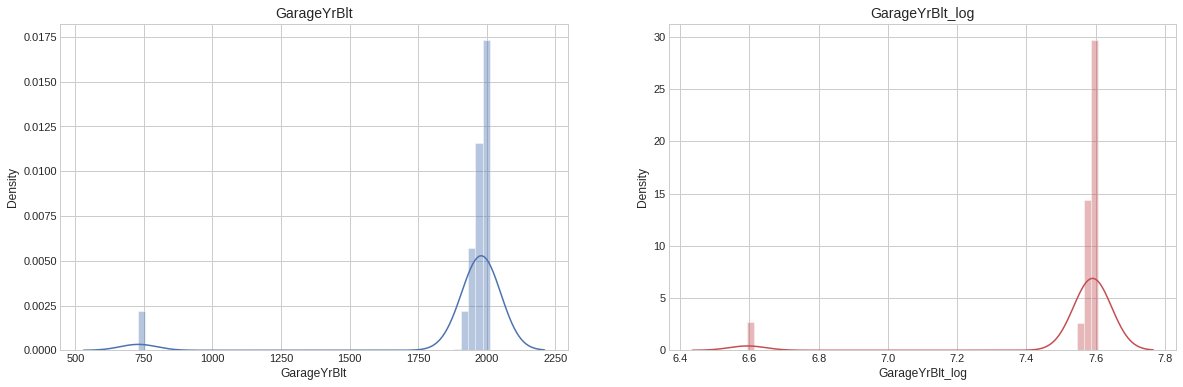

In [85]:
# GarageYrBlt

f,(ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))

ax1.set_title("GarageYrBlt", fontsize=14)
ax2.set_title("GarageYrBlt_log", fontsize=14)

sns.distplot(df_num_strong['GarageYrBlt'], color="b", ax=ax1)
sns.distplot(df_num_strong['GarageYrBlt_log'], color="r", ax=ax2)

**Observation**

As visible , GarageYrBlt is left skewed and Log transformation is used to remove the right skewness generally

In [86]:

# Applying other transformation on GarageyrBlt

GarageYrBlt_square = np.square(df_num_strong['GarageYrBlt'])
GarageYrBlt_square.skew()

-3.791461982846284

In [87]:
GarageYrBlt_cube = np.power(df_num_strong['GarageYrBlt'],3)
GarageYrBlt_cube.skew()


-3.714736711668768

In [88]:
# As the skewness is not been removed after several transformation, we will drop the feature

df_num_strong.drop(['GarageYrBlt','GarageYrBlt_log'], axis = 1, inplace = True)

In [89]:
df_num_strong.shape

(1459, 18)

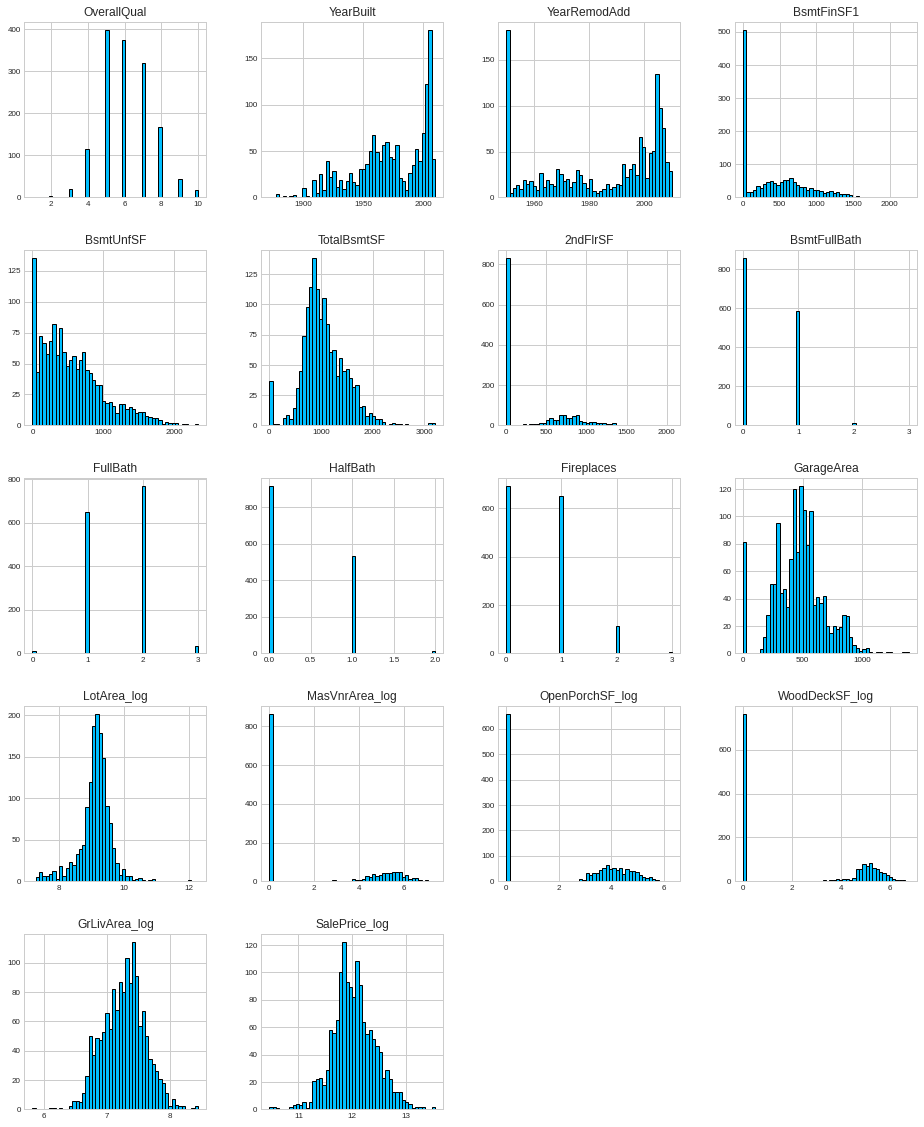

In [90]:
# Plot the distribution of all the numerical features
fig_ = df_num_strong.hist(figsize=(16, 20), bins=50, color="deepskyblue",
                               edgecolor="black", xlabelsize=8, ylabelsize=8)

In [91]:
df_cat.shape

(1460, 112)

In [92]:
df_num_strong.shape

(1459, 18)

In [93]:
# removing the outlier row from df_cat as well

df_cat.drop([1298], axis=0, inplace=True)
df_cat.shape

(1459, 112)

In [94]:
# Combining the categorical and numerical data for modelling

final_data = pd.concat([df_cat,df_num_strong], axis=1)
final_data.shape

(1459, 130)

In [95]:
final_data.columns

Index(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish',
       'MSZoning_FV',
       ...
       'FullBath', 'HalfBath', 'Fireplaces', 'GarageArea', 'LotArea_log',
       'MasVnrArea_log', 'OpenPorchSF_log', 'WoodDeckSF_log', 'GrLivArea_log',
       'SalePrice_log'],
      dtype='object', length=130)

# Splitting the Dataset for training and testing

In [96]:
# TRAINING DATASET
# Feature variables
X = final_data.copy().drop(["SalePrice_log"], axis = 1)

# Target Variable
y = final_data.loc[:, "SalePrice_log"]

print(X.shape)
print(y.shape)

(1459, 129)
(1459,)


In [97]:
# Train-Test Split

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 90) 

# Checking the shape of train and test data

print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (1167, 129)
y_train shape:  (1167,)

Test cases as below
X_test shape:  (292, 129)
y_test shape:  (292,)


# Model Development

In [111]:
# Create a list 

Models = [LinearRegression(),Ridge(alpha = 0.001),Lasso(alpha = 0.001),DecisionTreeRegressor(),KNeighborsRegressor(n_neighbors=5, p=2),
          RandomForestRegressor(max_depth=6, random_state=0), SVR(C=0.8, epsilon=0.2, kernel='poly')]

In [112]:
# Training all the models and storing the model evaluation metrics in Dictionary

Train_rmse_dict = {}
Test_rmse_dict = {}
Train_r2_dict = {}
Test_r2_dict = {}

for Regressor in Models:
  Regressor.fit(X_train, y_train)
  y_test_pred = Regressor.predict(X_test)
  y_train_pred = Regressor.predict(X_train)
  r2_train = r2_score(y_train_pred,y_train)    # R2
  r2_test = r2_score(y_test_pred,y_test)       # R2
  rmse_train = np.sqrt(mean_squared_error(y_train_pred,y_train))       # RMSE
  rmse_test = np.sqrt(mean_squared_error(y_test_pred,y_test))          # RMSE
  Train_rmse_dict[type(Regressor).__name__] = rmse_train
  Test_rmse_dict[type(Regressor).__name__] = rmse_test
  Train_r2_dict[type(Regressor).__name__] = r2_train
  Test_r2_dict[type(Regressor).__name__] = r2_test

# Model Evaluation

In [113]:
# Plotting the accuracy of training and test dataset for the models

RMSE_Train = pd.DataFrame(Train_rmse_dict,index=[0]).T
RMSE_Test = pd.DataFrame(Test_rmse_dict,index=[1]).T
R2_Train = pd.DataFrame(Train_r2_dict,index=[2]).T
R2_Test = pd.DataFrame(Test_r2_dict,index=[3]).T

In [114]:
Model_Evaluation_Score = pd.concat([RMSE_Train, RMSE_Test, R2_Train, R2_Test], axis=1, join='inner')
Model_Evaluation_Score.rename(columns = {0 : 'RMSE_Train', 1 : 'RMSE_Test',2 : 'R2_Train', 3 : 'R2_Test'}, inplace = True)
display(Model_Evaluation_Score)

,RMSE_Train,RMSE_Test,R2_Train,R2_Test
LinearRegression,0.10,0.16,0.93,0.84
Ridge,0.10,0.16,0.93,0.84
Lasso,0.12,0.15,0.90,0.85
DecisionTreeRegressor,0.00,0.20,1.00,0.75
KNeighborsRegressor,0.17,0.21,0.76,0.64
RandomForestRegressor,0.10,0.16,0.92,0.80
SVR,0.18,0.21,0.71,0.63


r2_ = r2_score(test, pred) 
rmse_ = np.sqrt(mean_squared_error(test, pred))

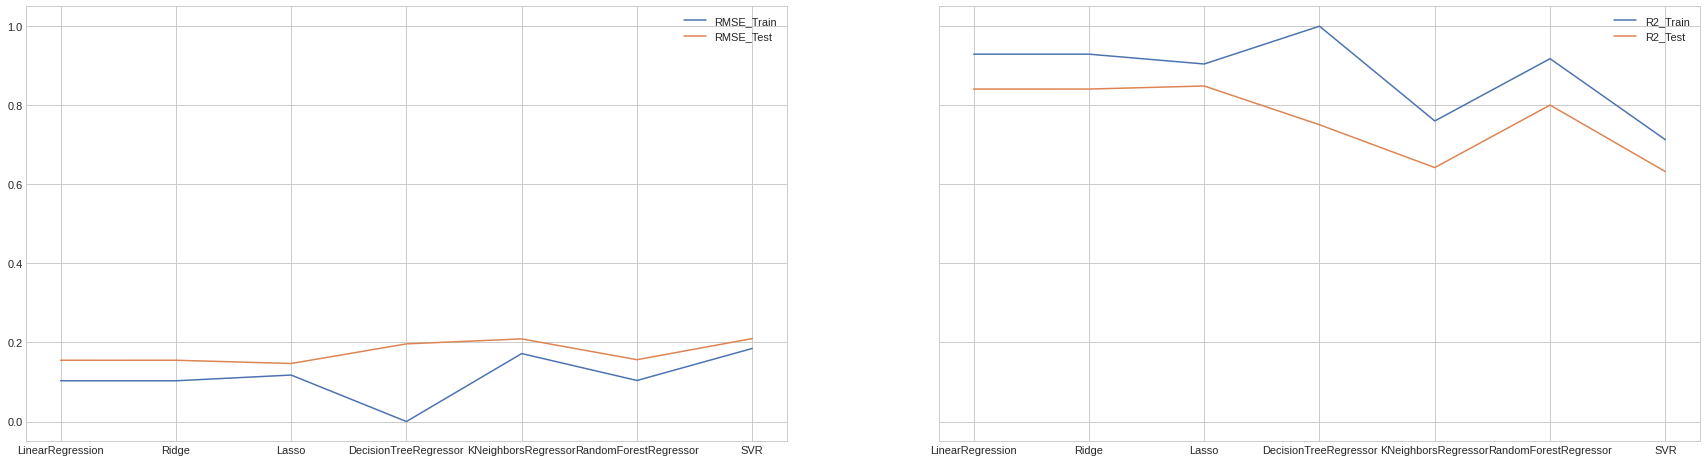

In [157]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(30,8), sharey=True)

Model_Evaluation_Score[['RMSE_Train','RMSE_Test']].plot(ax=ax1, grid = 'on')
Model_Evaluation_Score[['R2_Train','R2_Test']].plot(ax=ax2, grid = 'on')